# Exploratory Data Analysis - US Accidents (Shadowing)

### In this project we are going to explore a dataset of the accidents in USA from 2016 to 2020. There are almost 1.5 million record. We are going to explore the data and then clean it, afterward we are going to ask intersting questions and answer them.

In [188]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Imporing the file 

In [189]:
file = pd.read_csv(r'C:\Users\ASUS\Desktop\ICS 104\Data Science Stuff\EDA Project\US_Accidents_Dec20_updated.csv')

## Exploring the data

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [4]:
file.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
file.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Rearrange the columns

In [6]:
cols = file.columns.tolist()

#### they are comming as strings for some reason ### so I appended them to empty lists ####

col8 = [''.join(list(cols[8]))]
col9 = [''.join(list(cols[9]))]

cols1 = cols[0:4] + col8 + col9 +cols[4:8] + cols[9:]



filetest = file.reindex(columns=cols1)
filetest.head()

file = filetest

## Remove duplicate records

In [7]:
file[file.duplicated(['ID'], keep=False)]


### There are no duplicate records

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight


## Fixing null data

In [8]:
file.isnull().sum()


### Temp. , Wind Chill, Wind speed, precipitation (take the average of the state and subt. the null by it).
### Sunrise and sunset, fix it by considering time

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Distance(mi)                   0
Description                    0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Co

<AxesSubplot:>

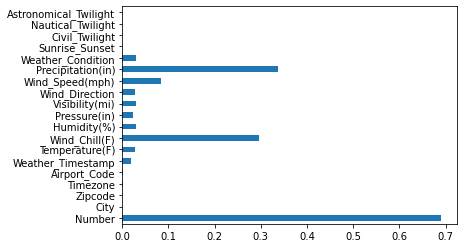

In [9]:
## lets find the percentage of the null values per column

percentage_missing_values = file.isnull().sum()/len(file)

percentage_only_missing_values = percentage_missing_values[percentage_missing_values != 0]

percentage_only_missing_values.plot(kind='barh')

In [10]:
## delete the columns with 30% missing values or more

del file['Wind_Chill(F)']
del file['Number']
del file['Precipitation(in)']


In [11]:
## we will take some columns and start to dig deep a little bit.

file.columns

# the columns are:
##  City, Start Time, Temp., Weather Condition, and Severity


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
       'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Data Analysis and Visualization


### Questions to answers:
    1- Is NYC in the data? if yes, why it is not one the highest number of accidents cities? if no, mention that! 
    2- Among the top 100 cities in number of accidents, which states do they belong to most frequently?(COULD NOT ASNWER IT HELP)
    3- At what time do most accidents happen at?
    4- which days of the week most accidents happen at?
    5- which months have the most accidents?
    6- What is the trend of the number of accidents year per year? (increasing/decreasing)
    7- Do most accidents happen at day or at night?
    8- which region has the highest number of accidents?
    

## Analysing City 

In [12]:
len(file.City.unique())

## Quite a lot ha? if you doubt the number google it! I did and the number of cities in the US is 19,502!!!!!!

10658

In [13]:
file['Count'] = 1

cities_by_accidents = file.groupby('City')['Count'].sum()

cities_by_accidents.sort_values(ascending = False)[0:20]

City
Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: Count, dtype: int64

In [14]:
'New York City' in file.City

len(file.State.unique())

 

49

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(-10.0, 5000.0)]

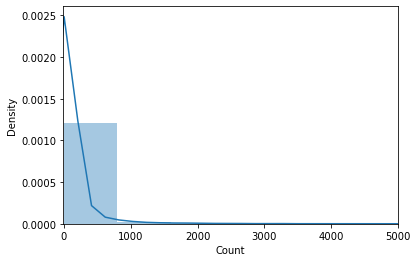

In [15]:
## what about looking for the distribution of the number of accidents in the cities

import seaborn as sns

distribution = sns.distplot(cities_by_accidents)

distribution.set(xlim=(-10, 5000))

### it seems there are a lot of cities with ZERO accidensts

In [16]:
high_accidents_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accidents_cities = cities_by_accidents[cities_by_accidents < 1000]


print('percentage of high accidents cities is', len(high_accidents_cities)/len(cities_by_accidents))
print('percentage of low accidents cities is',len(low_accidents_cities)/len(cities_by_accidents))


percentage of high accidents cities is 0.02355259453880079
percentage of low accidents cities is 0.9764474054611992


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Count', ylabel='Density'>

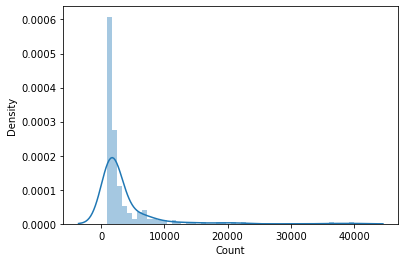

In [17]:
sns.distplot(high_accidents_cities)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Count', ylabel='Density'>

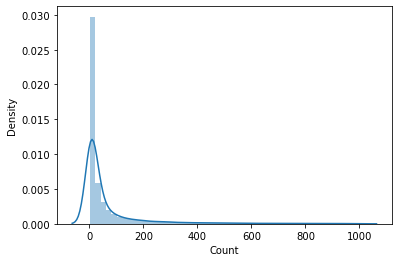

In [18]:
sns.distplot(low_accidents_cities)

In [19]:
len(cities_by_accidents)
print('number of cities with less than 100 accidents',len(cities_by_accidents[cities_by_accidents < 100]))

## which is weird, since it is a record of 4 years!

number of cities with less than 100 accidents 8682


## Analysing Start Time 

In [53]:
file.Sunrise_Sunset.unique()

file[(file['Sunrise_Sunset'] != 'Night') & ( file['Sunrise_Sunset'] != 'Day')]

## there are 83 null records

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Count,Start_Time_Hour,Start_Time_DayMonth,Start_Time_DayWeek
36173,A-2752773,4,2016-12-11 16:33:08,2016-12-11 22:33:08,3.271,Closed between CT-120A/King St/Exit 27 and Rou...,41.03674,-73.67549,41.083450,-73.665300,...,False,False,NaN,NaN,NaN,NaN,1,16,11,6
45085,A-2761685,4,2017-01-10 04:51:19,2017-01-10 10:51:19,0.945,Closed between State Line Rd and Kings Church ...,40.84309,-84.80236,40.844250,-84.784350,...,False,False,NaN,NaN,NaN,NaN,1,4,10,1
45093,A-2761693,4,2017-01-10 06:13:46,2017-01-10 12:13:46,0.945,Closed between State Line Rd and Kings Church ...,40.84309,-84.80236,40.844250,-84.784350,...,False,False,NaN,NaN,NaN,NaN,1,6,10,1
45243,A-2761843,4,2017-01-10 09:42:10,2017-01-10 15:42:10,2.025,Closed between State Line Rd and Decatur - Roa...,40.84309,-84.80236,40.841207,-84.841024,...,False,False,NaN,NaN,NaN,NaN,1,9,10,1
58509,A-2775109,4,2016-11-17 06:51:47,2016-11-17 12:51:47,0.069,Closed at CT-120A/King St/Exit 27 - Road close...,41.03674,-73.67549,41.037639,-73.674930,...,False,False,NaN,NaN,NaN,NaN,1,6,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385953,A-4109296,2,2017-12-13 18:38:56,2017-12-14 00:38:56,0.425,At Sheridan St - Accident.,38.96571,-77.00246,38.971000,-76.998430,...,True,False,NaN,NaN,NaN,NaN,1,18,13,2
1394637,A-4117980,2,2017-11-06 09:08:42,2017-11-06 15:08:42,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,41.03674,-73.67549,41.083450,-73.665300,...,False,False,NaN,NaN,NaN,NaN,1,9,6,0
1402521,A-4125864,4,2017-11-24 04:48:21,2017-11-24 10:48:21,1.873,Closed between State Highway 5 and 170th Ave -...,40.58687,-92.98509,40.608917,-92.964332,...,False,False,NaN,NaN,NaN,NaN,1,4,24,4
1407739,A-4131082,2,2017-10-09 15:46:08,2017-10-09 21:46:08,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,41.03674,-73.67549,41.083450,-73.665300,...,False,False,NaN,NaN,NaN,NaN,1,15,9,0


In [22]:
file.info()

# we can see that the Start Time column has object type we should convert it into data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Distance(mi)           1516064 non-null  float64
 5   Description            1516064 non-null  object 
 6   Start_Lat              1516064 non-null  float64
 7   Start_Lng              1516064 non-null  float64
 8   End_Lat                1516064 non-null  float64
 9   End_Lng                1516064 non-null  float64
 10  Description            1516064 non-null  object 
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [23]:
file['Start_Time'] = pd.to_datetime(file['Start_Time'])

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1516064 non-null  object        
 1   Severity               1516064 non-null  int64         
 2   Start_Time             1516064 non-null  datetime64[ns]
 3   End_Time               1516064 non-null  object        
 4   Distance(mi)           1516064 non-null  float64       
 5   Description            1516064 non-null  object        
 6   Start_Lat              1516064 non-null  float64       
 7   Start_Lng              1516064 non-null  float64       
 8   End_Lat                1516064 non-null  float64       
 9   End_Lng                1516064 non-null  float64       
 10  Description            1516064 non-null  object        
 11  Street                 1516064 non-null  object        
 12  Side                   15160

In [24]:
# Creat a column that represent the hour only of each accident only
file['Start_Time_Hour'] = file['Start_Time'].dt.hour
file

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Count,Start_Time_Hour
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,40.10891,-83.09286,40.11206,-83.03187,...,False,False,False,False,Night,Night,Night,Night,1,0
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,0.747,At OH-4/OH-235/Exit 41 - Accident.,39.86542,-84.06280,39.86501,-84.04873,...,False,False,False,False,Night,Night,Night,Night,1,5
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,0.055,At I-71/US-50/Exit 1 - Accident.,39.10266,-84.52468,39.10209,-84.52396,...,False,False,False,False,Night,Night,Night,Day,1,6
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,0.219,At I-71/US-50/Exit 1 - Accident.,39.10148,-84.52341,39.09841,-84.52241,...,False,False,False,False,Night,Night,Night,Day,1,6
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,0.123,At Dart Ave/Exit 21 - Accident.,41.06213,-81.53784,41.06217,-81.53547,...,False,False,False,False,Night,Night,Day,Day,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,At Market St - Accident.,34.00248,-117.37936,33.99888,-117.37094,...,False,False,False,False,Day,Day,Day,Day,1,18
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,At Camino Del Rio/Mission Center Rd - Accident.,32.76696,-117.14806,32.76555,-117.15363,...,False,False,False,False,Day,Day,Day,Day,1,19
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,At Glassell St/Grand Ave - Accident. in the ri...,33.77545,-117.84779,33.77740,-117.85727,...,False,False,False,False,Day,Day,Day,Day,1,19
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,33.99246,-118.40302,33.98311,-118.39565,...,False,False,False,False,Day,Day,Day,Day,1,19


In [25]:
file.groupby('Start_Time_Hour')['Count'].sum()

Start_Time_Hour
0      46125
1      43434
2      38801
3      32175
4      29478
5      40105
6      57859
7      73938
8      75802
9      59744
10     50442
11     51884
12     72283
13     83700
14     90162
15    100074
16    105559
17    108011
18     91413
19     65190
20     53515
21     48988
22     49156
23     48226
Name: Count, dtype: int64

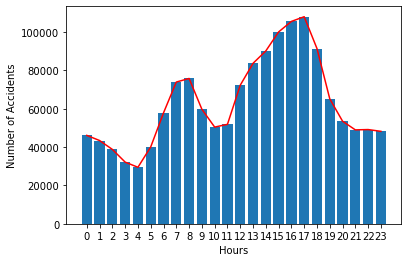

In [26]:
import matplotlib.pyplot as plt

results = file.groupby('Start_Time_Hour')['Count'].sum()
hours = [hour for hour,df in file.groupby('Start_Time_Hour')] 

plt.plot(hours, results, color ='r')
plt.bar(hours, results)
plt.xticks(hours)
plt.ylabel('Number of Accidents')
plt.xlabel('Hours')
plt.show()


In [27]:
file['Start_Time_DayMonth'] = file['Start_Time'].dt.day

In [28]:
file.groupby('Start_Time_DayMonth')['Count'].sum()

Start_Time_DayMonth
1     44565
2     42777
3     44700
4     39014
5     41317
6     46626
7     47869
8     47586
9     49007
10    50708
11    51219
12    54623
13    52237
14    49447
15    46656
16    49764
17    50733
18    52193
19    52196
20    51543
21    51034
22    53388
23    55903
24    54602
25    49999
26    49408
27    48310
28    51851
29    50888
30    54565
31    31336
Name: Count, dtype: int64

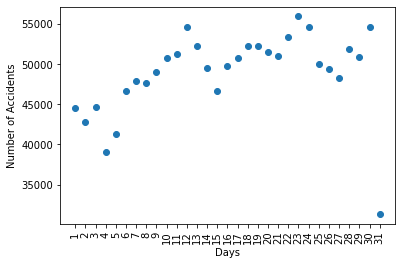

In [29]:
results = file.groupby('Start_Time_DayMonth')['Count'].sum()
days = [day for day,df in file.groupby('Start_Time_DayMonth')] 

plt.scatter(days, results)
plt.xticks(days, rotation = 'vertical')
plt.ylabel('Number of Accidents')
plt.xlabel('Days')
plt.show()


In [30]:
file['Start_Time_DayWeek'] = file['Start_Time'].dt.dayofweek

In [31]:
file.groupby('Start_Time_DayWeek')['Count'].sum()

Start_Time_DayWeek
0    235831
1    250900
2    255775
3    258036
4    254127
5    137620
6    123775
Name: Count, dtype: int64

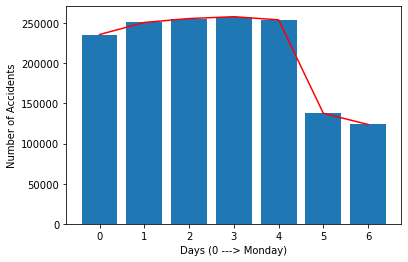

In [32]:
results = file.groupby('Start_Time_DayWeek')['Count'].sum()
daysw = [dayw for dayw,df in file.groupby('Start_Time_DayWeek')] 

plt.plot(daysw, results, color ='r')
plt.bar(daysw, results)
plt.xticks(daysw)
plt.ylabel('Number of Accidents')
plt.xlabel('Days (0 ---> Monday)')
plt.show()


In [33]:
time_dis_Sunday = file.Start_Time[file.Start_Time_DayWeek == 6].dt.hour
time_dis_Monday = file.Start_Time[file.Start_Time_DayWeek == 0].dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

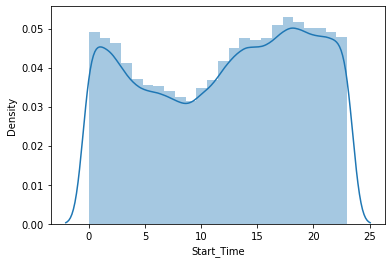

In [34]:
sns.distplot(time_dis_Sunday,bins=24)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

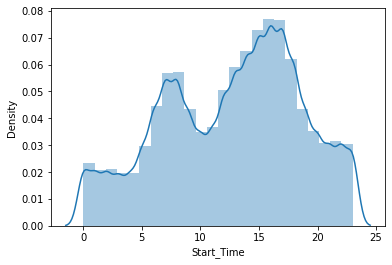

In [35]:
sns.distplot(time_dis_Monday,bins=24)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

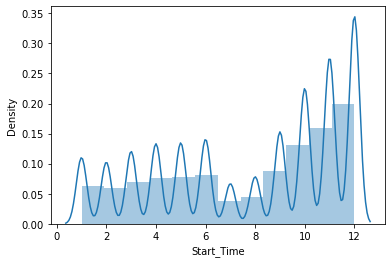

In [36]:
sns.distplot(file['Start_Time'].dt.month,bins=12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

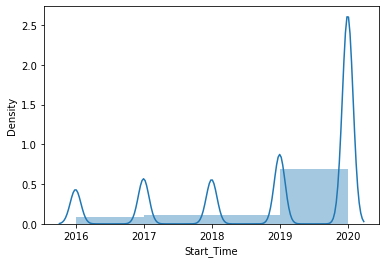

In [37]:
sns.distplot(file['Start_Time'].dt.year,bins=4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

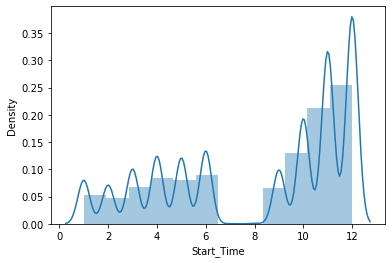

In [38]:
df2016 = file[file['Start_Time'].dt.year == 2020]

df2016['Start_Time'].dt.month
sns.distplot(df2016['Start_Time'].dt.month,bins=12)

Day percentage: 0.6001316567110623
Night percentage: 0.3998135962597885


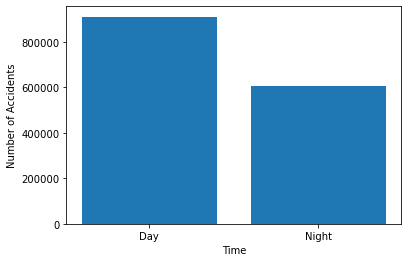

In [166]:
cond = [city for city,df in file.groupby('Sunrise_Sunset')]
results = file.groupby('Sunrise_Sunset')['Count'].sum()


# cities = [city for city,df in sales_file.groupby('City')] #### I still do not understand how he rearrange it
# results = sales_file.groupby('City').sum()


print('Day percentage:',file.groupby('Sunrise_Sunset')['Count'].sum()[0]/len(file))
print('Night percentage:',file.groupby('Sunrise_Sunset')['Count'].sum()[1]/len(file))


plt.bar(cond, results)
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()


# Analysing Start Ling. & Long.

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

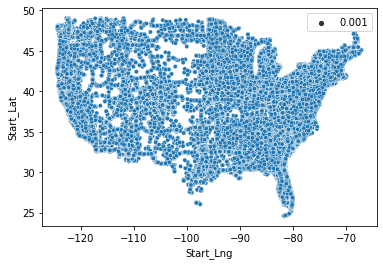

In [39]:

sns.scatterplot(x=file.Start_Lng, y=file.Start_Lat, size=0.001)

In [40]:
# import folium
!pip install folium
import folium

## Analysing Severity 

Severity
1      28178
2    1212382
3     161052
4     114452
Name: Count, dtype: int64


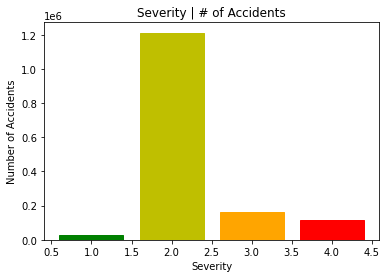

In [187]:
print(file.groupby('Severity')['Count'].sum())


severity = [severity for severity,df in file.groupby('Severity')]
results = file.groupby('Severity')['Count'].sum()

# plt.bar(severity, results)

barlist=plt.bar(severity, results)
colors = ['g','y','orange','r']
for i in range(4):
    barlist[i].set_color(colors[i])
plt.title('Severity | # of Accidents')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


# Conclusions:

## Insights:
    1- No data for NYC
    2- less than 2.5% of the cities have more than 1000 accidents
    3- LA and Miami have the highest number of accidents among all cities in US (NOT per capita (it is not a good insight))
    4- A high percentage of accidents occurs between 6AM - 9AM and 12PM - 6PM (Obviouly people in hurry to go work or back from work OR people are tired- did not get enough sleep/ worked hard and got tired.)
    5- Weekdays have much higher accidents than weekends (especially from Wendsday to Friday)
    6- We can see that the day of the month does not show any direct correlation with the number of accidents.
    7- The distribution of accidents in week days differ than weekends!!
    8- There missing data in 2016 and in 2020 
    9- The trend of the number of accidents per year is an increasing trend
    10- 60% of the accidents happen at day time!!
    11- From the scatter of the Lang. and Lat. we can see that the center regions have less number of accidents while the east regions have the highest number of accidents (this could be due to the missing data though)
    12- Most accidents are of severity '2'.
    